<div style="text-align: center; font-family: Arial, sans-serif; margin-top: 50px;">
<h1 style="font-size: 36px; font-weight: bold; color: #4CAF50;">Mini-projet 1 - Méthode Monte Carlo</h1>
<h2 style="font-size: 20px; font-weight: bold; color: #4CAF50;">PHS3903</h2>
<h2 style="font-size: 20px; margin-bottom: 20px;"> Marie-Lou Dessureault, Elliott Menu, Tendano Yehama Bantia Luther</h2> 
<h2 style="font-size: 16px; margin-bottom: 10px;">2211129, 2147422,2141649 </h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">22 janvier 2024</h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">Shawn Molesky, Maksim Skorobogatiy, Jérémie Villeneuve</h2>
</div>


### Calcul du volume d'une $N$-sphère (20 points)

### Introduction
Une $N$-sphère de rayon $R$ est définie comme l'ensemble des points situés à une distance inférieure ou égale à $R$ de l'origine dans un espace à $N$ dimensions. Si on utilise les coordonnées cartésiennes $(x_1, x_2, \dots, x_N)$ pour décrire un point, alors ce point est situé à l'intérieur de la $N$-sphère si le critère suivant est respecté :

$$
\sum_{i=1}^{N} x_i^2 \leq R^2, \quad N=1,2,\dots
$$

Voici quelques exemples de $N$-sphères afin de clarifier ce concept :
* Une 3-sphère est la sphère habituelle en trois dimensions. Son volume est la boule dont la sphère est le contour.
* Une 2-sphère est un cercle. Son volume est l'aire du disque circonscrit par le cercle.
* Une 1-sphère est formée de deux points sur une droite qui sont situés à égale distance de l'origine. Son volume est défini comme la longueur du segment.

Ce concept peut sembler abstrait, mais il apparaît naturellement en physique statistique quand on travaille dans l'espace de phase pour étudier les propriétés d'un ensemble de $N$ particules avec une énergie fixe (ex. : gaz idéal dans une boîte fermée). 

Dans ce mini-devoir, on vous demande de calculer le volume d'une $N$-sphère de rayon unitaire $R=1$ à l'aide de la méthode de Monte-Carlo vue en classe pour le calcul d'intégrales. Le résultat est déjà connu, à savoir :

$$
V_N = \frac{\pi^{N/2}}{\Gamma\left(\frac{N}{2} + 1\right)},
$$
où $\Gamma(x)$ est la fonction gamma, ce qui vous permettra de calculer l'erreur afin d'analyser le comportement de l'algorithme.

### Choix de la méthode de Monte-Carlo

**a) [4 pts]** Expliquer pourquoi les méthodes de Monte Carlo pour l'intégration sont avantageuses pour le calcul d'intégrales à $N$ dimensions lorsque $N$ devient grand.

### Réponse a):
Les méthodes de Monte-Carlo sont avantageuses pour l’intégration en haute dimension car leur erreur moyenne décroît proportionnellement à $ \frac{1}{\sqrt{N_{\text{tot}}}} $, indépendamment du nombre de dimensions $N$, et elles nécessitent ainsi beaucoup moins de points d’évaluation que les méthodes de quadrature, dont le coût croît exponentiellement avec $N$. Cette efficacité et robustesse, indépendantes de la forme de la fonction ( meme impossible a résoudre analytiquement) , en font souvent la seule option pratique pour des intégrales de grande dimension.



### Calcul du volume

**b) [6 pts]** Calculer le volume d'une $N$-sphère de rayon unitaire pour $N = \left\{3,6\right\}$. Pour chacune de ces $N$-sphères, calculer le résultat en faisant varier le nombre de points générés à chaque essai en utilisant les valeurs $N_{tot} = \left\{100,200,400,800,1600\right\}$. Générer 100 essais par simulation et utiliser la valeur moyenne du volume comme résultat. On vous demande donc de calculer dix valeurs de volume (cinq par $N$-sphère).

Présenter vos résultats sous forme de tableau, en fournissant une incertitude relative sur chaque résultat. Expliquer comment cette incertitude a été calculée.

### Réponse b):
Pour calculer le volume d'une $N$-sphère, le code ci-dessous a été utilisé. Les résultats obtenus pour les valeurs de $N$ et $N_{tot}$ demandées sont présentés dans le tableau 1 ci-dessous. L'incertitude de chaque résultat a été obtenue à partir de l'écart-type des 100 essais:
$$
\sigma =  \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2},
$$
où $N=100$ dans le cas ci-présent, et $\mu$ est la moyenne des 100 essais. Pour obtenir l'incertitude relative, l'incertitude $\sigma$ est divisée par la moyenne $\mu$ des essais:
$$
\sigma_{rel} = \frac{\sigma}{\mu}\cdot 100.
$$
La multiplication par 100 sert à ramener l'incertitude relative en terme de pourcentage.
<table border="1" width="75%" align="center">
    <caption>Tableau 1: Volume d'une N-sphère pour N={3,6} et pour certains N<sub>tot</sub></caption>
    <tr>
        <th>N</th>
        <th colspan="5">3</th>
        <th colspan="5">6</th>
    </tr>
    <tr>
        <td>N<sub>tot</sub></td>
        <td>100</td>
        <td>200</td>
        <td>400</td>
        <td>800</td>
        <td>1600</td>
        <td>100</td>
        <td>200</td>
        <td>400</td>
        <td>800</td>
        <td>1600</td>
    </tr>
    <tr>
        <td>Volume</td>
        <td>4.2560 &plusmn; 9,68% </td>
        <td>4.1932 &plusmn; 6,30%</td>
        <td>4.1970 &plusmn; 4,87%</td>
        <td>4.2007 &plusmn; 3,62%</td>
        <td>4.1861 &plusmn; 2,58%</td>
        <td>5.2672 &plusmn; 32,69%</td>
        <td>5.1872 &plusmn; 23,66%</td>
        <td>4.9968 &plusmn; 17,07%</td>
        <td>5.0872 &plusmn; 12,68%</td>
        <td>5.1792 &plusmn; 8,87%</td>
    </tr>
</table>


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Paramètres géométriques
R = 1.0 # Rayon de la sphère (m)

# Paramètres généraux de simulation
D_val = [3,6]  # Nombre de dimensions
Ntot_val = 100 * 2 ** (np.arange(0, 5, 1))  # Nombre de points par essai
Ness = 100 # Nombre d'essais par simulation

a = 1  # Dimension de la boîte cubique dans laquelle les points aléatoires seront générés

# Boucle sur le nombre de simulations
ND = len(D_val)
NNtot = len(Ntot_val)

V = np.zeros((ND, NNtot))  # Volumes calculés pour chaque série d'essais
inc = np.zeros((ND, NNtot)) # Incertitudes pour chaque série d'essais
err_arr = np.zeros_like(V)

for d in range(0, ND):
    D = D_val[d]  # Dimension
    Vtot = ( a * 2 ) ** D # Volume du domaine
    Vth = (np.pi ** (D / 2)) / math.gamma(D / 2 + 1)
   
    for n in range(0, NNtot):
        Ntot = Ntot_val[n]  # Nombre de points

        Vind = np.zeros(Ness) # Volumes calculés pour chaque essai individuel
        e = np.zeros_like(Vind)
        for k in range(0, Ness): # Boucle sur les essais
            # Génération des nombres aléatoires (distribution uniforme)
            np.random.seed() # Initialise le générateur de nombres pseudo-aléatoires afin de ne pas toujours produire la même séquence à l'ouverture de Python...
            pts = a * np.random.uniform(low=-a, high=a, size=(Ntot, D)) # Coordonnées des points
            
            # Calcul du volume
            distances = np.linalg.norm(pts, axis=1)
            Nint = np.sum(distances <= R) # Nombre de points à l'intérieur
            Vind[k] = Nint / Ntot * Vtot # Volume calculé pour cet essai
            e[k] = np.abs((Vind[k] - Vth)/ Vth)

        err_arr[d,n]= np.mean(e) # Erreur relative sur tous les essais
        V[d, n] = np.mean(Vind) # Volume moyenné sur l'ensemble des essais
        inc[d, n] = np.std(Vind) # Incertitude sur l'ensemble des essais (écart-type)

inc_rel = inc / V * 100 # Calcul de l'incertitude relative
print("Volumes:", V)
print("Incertitude relative:", inc_rel)
print("erreur relative:", err_arr)

Volumes: [[4.2584 4.1856 4.241  4.1965 4.1818]
 [5.2544 5.1872 5.0608 5.2536 5.1688]]
Incertitude relative: [[10.02164129  6.96715605  4.84353256  3.39472521  2.61586881]
 [33.10232929 21.98972011 14.46497149 10.94709427  8.53760876]]
erreur relative: [[0.08509579 0.05543213 0.03956721 0.02738107 0.02094915]
 [0.27536134 0.17542659 0.1139868  0.09230616 0.06993752]]


### Analyse de l'erreur

**c) [4 pts]** À l'aide des résultats précédents obtenus, tracer un graphique de l'erreur relative $E$ sur le volume calculé en fonction de $N_{tot}$ pour chaque $N$-sphère. (Vous tracerez donc deux séries de données sur le même graphique.) Utiliser une échelle qui permet de représenter facilement le comportement de l'erreur.

### Réponse c):
Les valeurs pour l'erreur relative *E* ont été calculées en b) grâce à la formule:
$$
E = \frac{1}{V_{th}}[\frac{1}{100} \sum_{i=1}^{100}|(\frac{N_{in,i}}{N_{tot}}V_{tot}-V_{th})|]
$$
Où $V_{th}$ est le volume théorique de la n-sphère, calculé avec la fonction fournie dans l'énoncé

On utilisera une échelle logarithmique pour tracer les erreurs relatives pour mieux représenter l'évolution de l'erreur. On en profite aussi pour faire une régression linéaire pour associer une fonction au logarithme de l'erreur relative. 

Le comportement de l'erreur sera analysé en d) et en e)

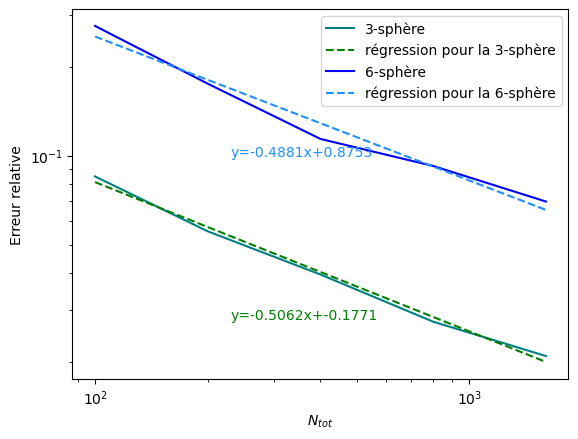

In [2]:
#initialisation de nos valeurs d'erreur relative et N_tot
E_3sphere = err_arr[0]
E_6sphere = err_arr[1]

# Imports de lineregress pour effectuer des régression linéaires à partir de nos données
from scipy.stats import linregress
#régression pour l'erreur relative de la 3-sphère
reg_3= linregress(np.log(Ntot_val),np.log(E_3sphere))
m3= reg_3.slope
b3= reg_3.intercept
#régression pour l'erreur relative de la 6-sphère
reg_6= linregress(np.log(Ntot_val), np.log(E_6sphere))
m6=reg_6.slope
b6=reg_6.intercept

#On trace le graphique de l'erreur relative
plt.loglog(Ntot_val, E_3sphere, label= "3-sphère", color= "teal")
plt.text(230,0.028,f"y={m3:.4f}x+{b3:.4f}", color= "green" )
plt.loglog(Ntot_val,(Ntot_val **m3)*np.exp(b3), "--",label = "régression pour la 3-sphère", color= "green")
plt.loglog(Ntot_val, E_6sphere, label = "6-sphère", color="b")
plt.text(230,0.1,f"y={m6:.4f}x+{b6:.4f}", color="dodgerblue")
plt.loglog(Ntot_val,(Ntot_val **m6)*np.exp(b6),"--", label = "régression pour la 6-sphère", color= "dodgerblue")
plt.xlabel("$N_{tot}$")
plt.ylabel("Erreur relative")
plt.legend()
plt.show()

**d) [2 pts]** Déterminer le comportement de l'erreur relative en calculant l'exposant $p$ tel que :

$$
E = O(N_{tot}^p)
$$
pour chacune des deux $N$-sphères.

### Réponse d):Nous considérons l’expression :

$$
E = O\bigl(N_{\text{tot}}^{\,p}\bigr).
$$

En effectuant une régression linéaire de $\log(E)$ en fonction de $\log(N_{\text{tot}})$, on obtient :

- **3-sphère :** $p \approx -0{,}51$
- **6-sphère :** $p \approx -0{,}49$

Ces valeurs sont très proches de $-\tfrac{1}{2}$, conformément au comportement attendu pour la méthode de Monte-Carlo, où l’erreur statistique décroit selon :

$$
\frac{1}{\sqrt{N_{\text{tot}}}}.
$$ext{tot}}}}.
$$


**e) [4 pts]** Discuter des points suivants :
* Comment les valeurs de $p$ calculées se comparent-t-elle aux valeurs théoriques attendues ?
* La précision des résultats obtenus est-elle la même pour la 3-sphère et pour la 6-sphère ?
* Comment l'incertitude relative calculée en (b) se compare-t-elle à l'erreur relative ?

### Réponse e):
*(Ajoutez votre réponse ici)*